In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/mid_term_nlp/imdb'

/content/drive/MyDrive/mid_term_nlp/imdb


In [3]:
import numpy as np
import pandas as pd
from utils import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
!python -m spacy download en_core_web_md
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_md")

2024-01-29 05:59:55.912244: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 05:59:55.912311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 05:59:55.913565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 05:59:57.207107: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [6]:
df = pd.read_csv('imdb.csv')
df = df[['Review','Sentiment']].dropna()

In [7]:
df = shuffle(df)
df = df[:10000]

In [8]:
df['Review'] = df['Review'].apply(clean_html)
df['Review'] = df['Review'].apply(convert_lower)
df['Review'] = df['Review'].apply(remove_special)
df['Review'] = df['Review'].apply(remove_stopwords)
df['Review'] = df['Review'].apply(stem_words)
df['Review'] = df['Review'].apply(join_back)

In [27]:
cv=CountVectorizer()
X = cv.fit_transform(df['Review']).toarray()

In [9]:
X = []
y = []
# Perform Tokenization
for idx, rw in df.iterrows():
 comments = rw["Review"]
 rating = rw["Sentiment"]
 y.append(rating)
 mtoks = [token.text for token in nlp(comments)]
 X.append(mtoks)

In [10]:
# Create ktoken and perform tokenization
ktoken = Tokenizer(lower=True)
ktoken.fit_on_texts(X)
# Create utterance sequences object
X = ktoken.texts_to_sequences(X)

In [11]:
# Set the max length to 50
MLEN = 200
# Create pad utterance sequence object
X = pad_sequences(X, MLEN, padding="post")

In [12]:
# Convert the ps_utterance into numpy arrays
X = np.array(X)
# Create the category list (catlist)
y = np.array(y)

In [13]:
y = y.reshape(y.shape[0] , 1)

In [28]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (10000, 36062)
y shape: (10000, 1)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

Naive Bayes

In [30]:
clf1=GaussianNB()

In [31]:
clf1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
y_pred1=clf1.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"NB accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred1, average='macro')
print(f"NB recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred1, average='macro')
print(f"NB F1:{f1 * 100:.3f}%")

NB accuracy:63.500%
NB recall:63.899%
NB F1:63.061%


In [41]:
label = ['Positive', 'Negative']

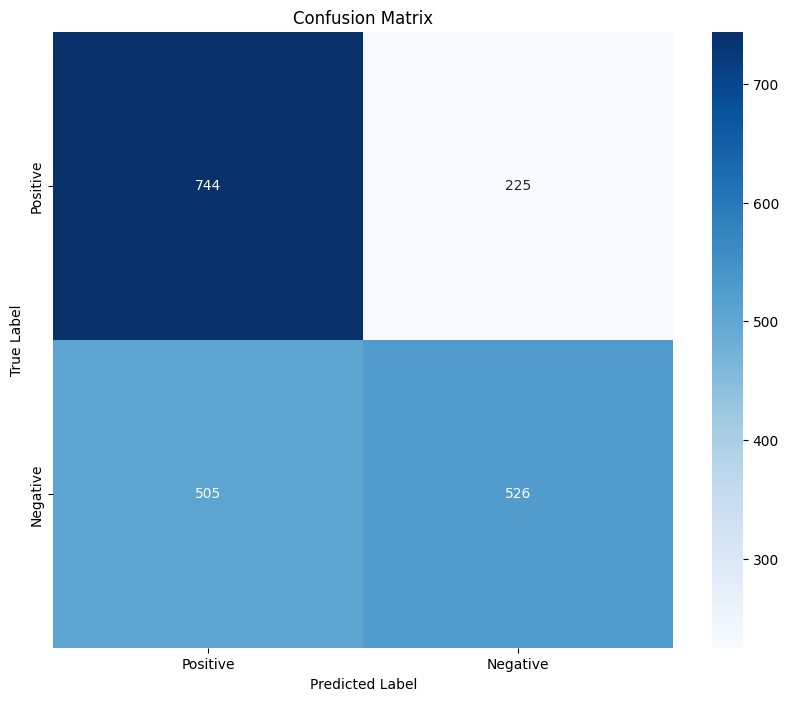

In [42]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

XGBoost

In [34]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [35]:
y_pred2 = xgb_model.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred2)
print(f"XGBoost accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred2, average='macro')
print(f"XGBoost recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred2, average='macro')
print(f"XGBoost F1:{f1 * 100:.3f}%")

XGBoost accuracy:83.450%
XGBoost recall:83.395%
XGBoost F1:83.419%


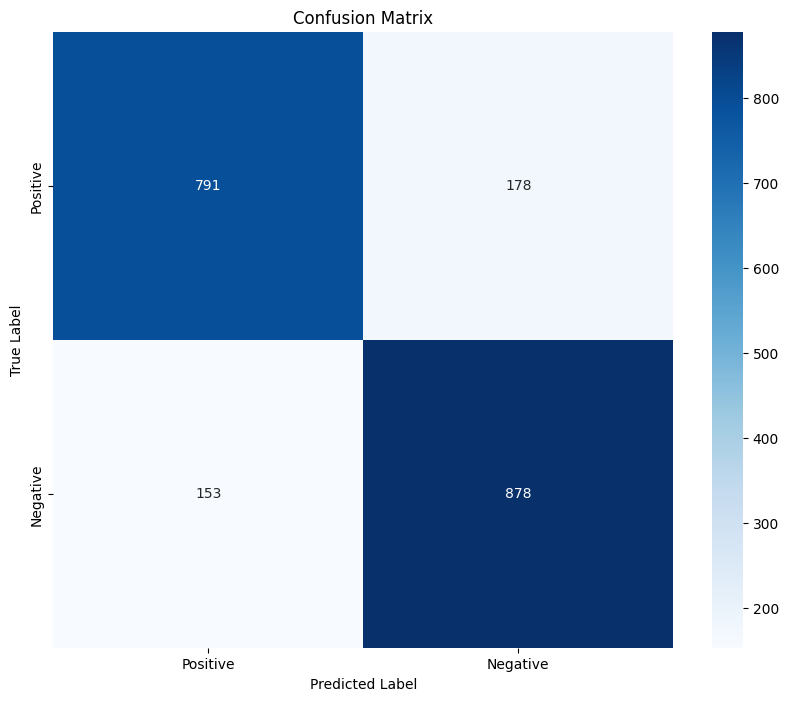

In [43]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest

In [37]:
clf3 = RandomForestClassifier(max_depth=19, random_state=42) # depth = 19, acc = 0.84
clf3.fit(X_train, y_train)

<ipython-input-37-82c6cb360f06>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf3.fit(X_train, y_train)


RandomForestClassifier(max_depth=19, random_state=42)

In [38]:
y_pred3 = clf3.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"RF accuracy:{accuracy * 100:.3f}%")
recall = recall_score(y_test, y_pred3, average='macro')
print(f"RF recall:{recall * 100:.3f}%")
f1 = f1_score(y_test, y_pred3, average='macro')
print(f"RF F1:{f1 * 100:.3f}%")

RF accuracy:84.000%
RF recall:83.932%
RF F1:83.963%


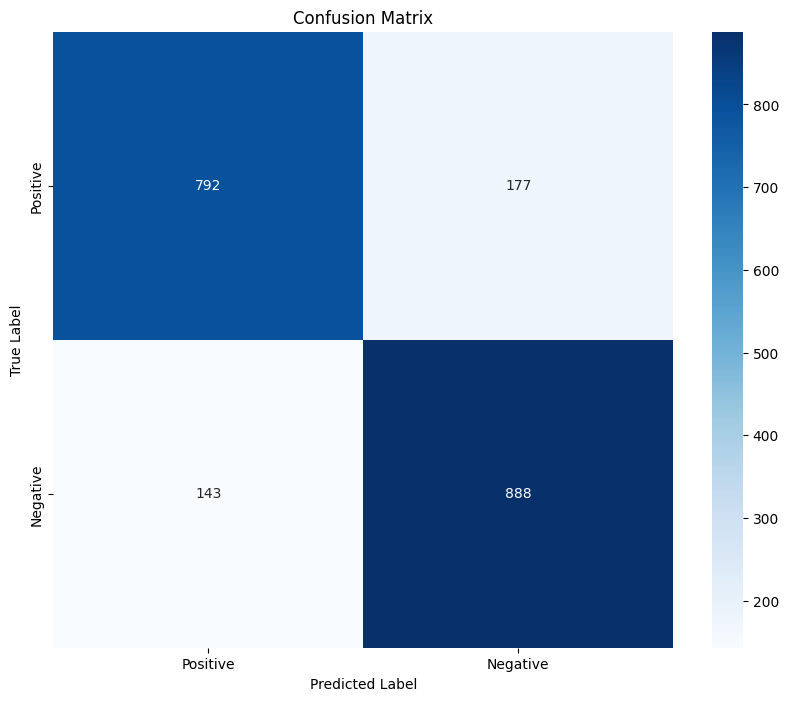

In [44]:
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label, yticklabels=label)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()